Import libraries and graph

In [347]:
import matplotlib.pyplot as plt
from cmath import sqrt
import networkx as nx
import pandas as pd
import numpy as np
from math import *

G_zachary =  nx.karate_club_graph()
print(nx.info(G_zachary))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


Presentation of the graph

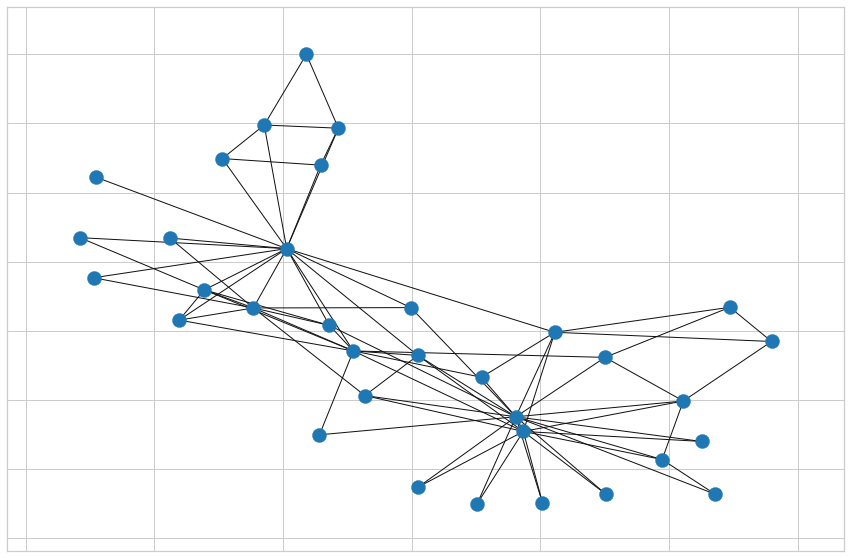

In [348]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G_zachary, node_size=200, with_labels=False)

Calculate Centrality measures for each node of the graph

In [349]:
dc, bc, cc, ec = [], [], [], []
node_list = []

degCent = nx.degree_centrality(G_zachary)
betCent = nx.betweenness_centrality(G_zachary)
closCent = nx.closeness_centrality(G_zachary)
eigCent = nx.eigenvector_centrality(G_zachary)

# Convert it to list
for i in (degCent):
    dc.append(degCent[i])
for i in (betCent):
    bc.append(betCent[i])
for i in (closCent):
    cc.append(closCent[i])
for i in (eigCent):
    ec.append(eigCent[i])

# Put all nodes number in a list so we can use it as an index in our DataFrame
for i in (eigCent):
    node_list.append(i)

decision_matrix = pd.DataFrame ({'DC': dc, 'BC': bc, 'CC': cc, 'EC': ec},  index=node_list)
decision_matrix

,DC,BC,CC,EC
0,0.484848,0.437635,0.568966,0.355483
1,0.272727,0.053937,0.485294,0.265954
2,0.303030,0.143657,0.559322,0.317189
3,0.181818,0.011909,0.464789,0.211174
4,0.090909,0.000631,0.379310,0.075966
5,0.121212,0.029987,0.383721,0.079481
6,0.121212,0.029987,0.383721,0.079481
7,0.121212,0.000000,0.440000,0.170955
8,0.151515,0.055927,0.515625,0.227405
9,0.060606,0.000848,0.434211,0.102675


Calculate normalized decision matrix

In [350]:
def normalizeDecisionMtrix(centrality_mesure):
    somme = 0
    list_tmp = []
    for x in (centrality_mesure.values):
        somme = somme + (x**2)
    somme = sqrt(somme)

    for i in (centrality_mesure.values):
        list_tmp.append(i/somme)

    return list_tmp

dc_n = normalizeDecisionMtrix(decision_matrix['DC'])
bc_n = normalizeDecisionMtrix(decision_matrix['BC'])
cc_n = normalizeDecisionMtrix(decision_matrix['CC'])
ec_n = normalizeDecisionMtrix(decision_matrix['EC'])

normalized_decision_matrix = pd.DataFrame ({'DC': dc_n, 'BC': bc_n, 'CC': cc_n, 'EC': ec_n},  index=node_list)
normalized_decision_matrix

,DC,BC,CC,EC
0,0.459588,0.732424,0.225688,0.355483
1,0.258518,0.090268,0.192498,0.265954
2,0.287242,0.240423,0.221862,0.317189
3,0.172345,0.019931,0.184365,0.211174
4,0.086173,0.001057,0.150458,0.075966
5,0.114897,0.050187,0.152208,0.079481
6,0.114897,0.050187,0.152208,0.079481
7,0.114897,0.000000,0.174532,0.170955
8,0.143621,0.093599,0.204529,0.227405
9,0.057448,0.001419,0.172235,0.102675


Calculate weighted decision matrix

In [351]:
for i in range(0, len(dc)):
    dc_n[i] = dc_n[i] * 0.2
    ec_n[i] = ec_n[i] * 0.2
    bc_n[i] = bc_n[i] * 0.3
    cc_n[i] = cc_n[i] * 0.3

weighted_decision_matrix = pd.DataFrame ({'DC': dc_n, 'BC': bc_n, 'CC': cc_n, 'EC': ec_n},  index=node_list)
weighted_decision_matrix

,DC,BC,CC,EC
0,0.091918,0.219727,0.067706,0.071097
1,0.051704,0.027080,0.057749,0.053191
2,0.057448,0.072127,0.066559,0.063438
3,0.034469,0.005979,0.055309,0.042235
4,0.017235,0.000317,0.045138,0.015193
5,0.022979,0.015056,0.045662,0.015896
6,0.022979,0.015056,0.045662,0.015896
7,0.022979,0.000000,0.052360,0.034191
8,0.028724,0.028080,0.061359,0.045481
9,0.011490,0.000426,0.051671,0.020535


Determine the positive ideal solution A+ and the negative ideal solution A-

In [352]:
positive_ideal = np.array([np.amax(dc_n), np.amax(bc_n), np.amax(cc_n), np.amax(ec_n)])
negative_ideal = np.array([np.amin(dc_n), np.amin(bc_n), np.amin(cc_n), np.amin(ec_n)])
print("A+ = ", positive_ideal)
print("A- = ", negative_ideal)

A+ =  [0.09766245 0.21972731 0.0677063  0.07467424]
A- =  [0.00574485 0.         0.03385315 0.00472696]


Calculate the positive ideal alternative Si+ and the negative ideal alternative Si-

In [353]:
positive_ideal_alternative = []
negative_ideal_alternative = []

for i in (node_list) :
    s_pos_element, s_neg_element = 0, 0
    
    for j in range(4) :
        s_pos_element = s_pos_element + ( ( weighted_decision_matrix.loc[i][j] - positive_ideal[j] ) ** 2 )
        s_neg_element = s_neg_element + ( ( weighted_decision_matrix.loc[i][j] - negative_ideal[j] ) ** 2 )

    s_pos_element = sqrt(s_pos_element)
    s_neg_element = sqrt(s_neg_element)
    
    positive_ideal_alternative.append(s_pos_element)
    negative_ideal_alternative.append(s_neg_element)

Calculate the relative closeness to the ideal solution Ci

In [354]:
relative_closeness_to_the_ideal_solution = []

for i in range (len(node_list)) :
    tmp_var = ( negative_ideal_alternative[i] / ( negative_ideal_alternative[i] + positive_ideal_alternative[i] ) )
    relative_closeness_to_the_ideal_solution.append(tmp_var)

Final table with the descending rank of the relative closeness to the ideal solution Ci

In [355]:
table = pd.DataFrame ({ 
                        'Si+': positive_ideal_alternative,
                        'Si-': negative_ideal_alternative,
                        'Ci': relative_closeness_to_the_ideal_solution},
                        index=node_list,
)
table["Ranking"] = table["Ci"].rank(ascending=False).astype(int)

table[table['Ranking'] <= 10].sort_values(by=["Ranking"])

,Si+,Si-,Ci,Ranking
0,0.006768,0.247501,0.973384,1
33,0.067096,0.194030,0.743052,2
32,0.150279,0.115401,0.434362,3
2,0.153397,0.111320,0.420525,4
31,0.167108,0.087736,0.344273,5
1,0.199464,0.075930,0.275714,6
8,0.205849,0.061106,0.228901,7
13,0.210587,0.058826,0.218350,8
3,0.225583,0.052231,0.188006,9
19,0.223495,0.040907,0.154715,10


Finding Top 10 nodes of TOPSIS and each Centrality Measures

In [356]:
# k = int(input("Write the top k number of node that you want : "))
k = 10

# top k nodes according to TOPSIS
top_k_node_topsis = []
topsis_nodes = table[table['Ranking'] <= k].sort_values(by=["Ranking"]).index
top_k_node_topsis = topsis_nodes.values.tolist()

# now we will take top k nodes from each centrality mesures and apply SI Model on it
# Top k nodes accordin to Degree Centrality

top_k_node_DC = []
degCent = pd.DataFrame({"dc_value": normalized_decision_matrix["DC"]}, index=node_list)
degCent["rank_dc"] = degCent["dc_value"].rank(ascending=False).astype(int)
degCent_nodes = degCent[degCent["rank_dc"] <= k].sort_values(by=["rank_dc"]).index
top_k_node_DC = degCent_nodes.values.tolist()

# Top k nodes accordin to Betweeness Centrality
top_k_node_BC = []
betCent = pd.DataFrame({"bc_value": normalized_decision_matrix["BC"]}, index=node_list)
betCent["rank_bc"] = betCent["bc_value"].rank(ascending=False).astype(int)
betCent_nodes = betCent[betCent["rank_bc"] <= k].sort_values(by=["rank_bc"]).index
top_k_node_BC = betCent_nodes.values.tolist()

# Top k nodes accordin to Closeness Centrality
top_k_node_CC = []
closCent = pd.DataFrame({"cc_value":  normalized_decision_matrix["CC"]}, index=node_list)
closCent["rank_cc"] = closCent["cc_value"].rank(ascending=False).astype(int)
closeCent_nodes = closCent[closCent["rank_cc"] <= k].sort_values(by=["rank_cc"]).index
top_k_node_CC = closeCent_nodes.values.tolist()

# Top k nodes accordin to Betweeness Centrality
top_k_node_EC = []
eigCent = pd.DataFrame({"ec_value":  normalized_decision_matrix["EC"]}, index=node_list)
eigCent["rank_ec"] = eigCent["ec_value"].rank(ascending=False).astype(int)
eigCent_nodes = eigCent[eigCent["rank_ec"] <= k].sort_values(by=["rank_ec"]).index
top_k_node_EC = eigCent_nodes.values.tolist()

print("top {} nodes of topsis : {}".format(k, top_k_node_topsis))
print("top {} nodes of DC : {}".format(k, top_k_node_DC))
print("top {} nodes of BC : {}".format(k, top_k_node_BC))
print("top {} nodes of CC : {}".format(k, top_k_node_CC))
print("top {} nodes of EC : {}".format(k, top_k_node_EC))

top 10 nodes of topsis : [0, 33, 32, 2, 31, 1, 8, 13, 3, 19]
top 10 nodes of DC : [33, 0, 32, 2, 1, 3, 31, 8, 13, 23]
top 10 nodes of BC : [0, 33, 32, 2, 31, 8, 1, 13, 19, 5]
top 10 nodes of CC : [0, 2, 33, 31, 8, 13, 32, 19, 1, 3]
top 10 nodes of EC : [33, 0, 2, 32, 1, 8, 13, 3, 31, 30]


SI Model

Applying SI Model to Top 10 nodes for Centrality measures

In [357]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

def SI(nodes):
    n = 34 # Nomber of nodes
    tmp_list = []
    model = ep.SIModel(G_zachary)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 1)
    cfg.add_model_initial_configuration('Infected', nodes)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'Nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1]]
        if iteration['node_count'][1] == n:
            break
    
    tmp_list.append(res['iteration'].tolist())
    tmp_list.append(res['Nb_Susceptible'].tolist())
    tmp_list.append(res['Nb_infected'].tolist())
                     
    return tmp_list

# Apply the SI methode to the top 10 nodes of TOPSIS and centrality measures

dc_si = SI(top_k_node_DC)
bc_si = SI(top_k_node_BC)
cc_si = SI(top_k_node_CC)
ec_si = SI(top_k_node_EC)
topsis_si = SI(top_k_node_topsis)

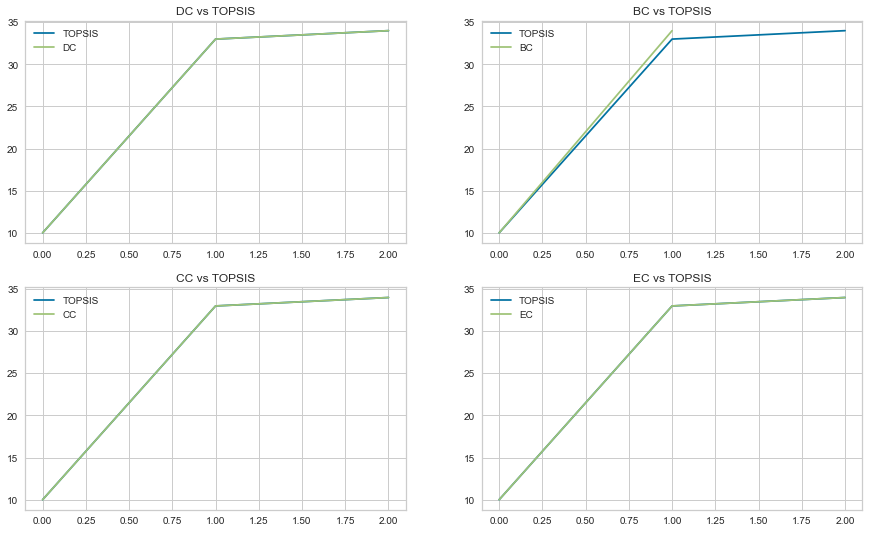

In [358]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs[0, 0].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[0, 0].plot(dc_si[0], dc_si[2], label="DC")
axs[0, 0].set_title("DC vs TOPSIS")
axs[0, 0].legend()

axs[0, 1].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[0, 1].plot(bc_si[0], bc_si[2], label="BC")
axs[0, 1].set_title("BC vs TOPSIS")
axs[0, 1].legend()

axs[1, 0].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[1, 0].plot(cc_si[0], cc_si[2], label="CC")
axs[1, 0].set_title("CC vs TOPSIS")
axs[1, 0].legend()

axs[1, 1].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[1, 1].plot(ec_si[0], ec_si[2], label="EC")
axs[1, 1].set_title("EC vs TOPSIS")
axs[1, 1].legend()

K-means Algorithm

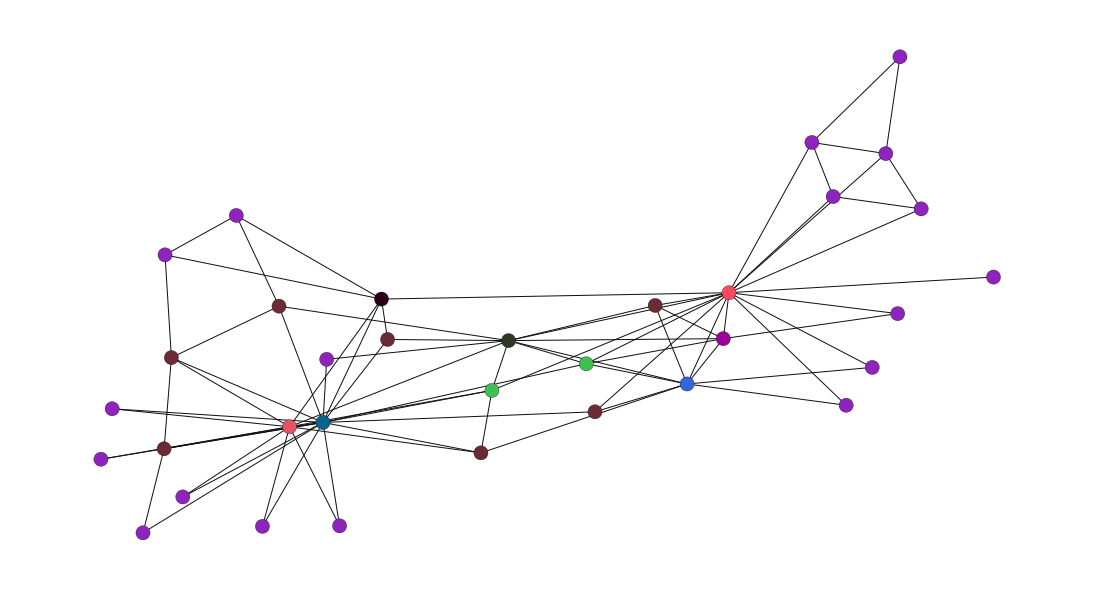

In [359]:
from sklearn.cluster import KMeans
import random

# decision_matrix contains all centrality measures given in the input of K-means algorithm
mesures_matrix = decision_matrix.to_numpy()

# n_clusters parameter is the number of clusters
# init parameter takes the centrality measures of the top k node generated by TOPSIS
y_pred = KMeans(n_clusters=k, init=mesures_matrix[top_k_node_topsis])
y_pred.fit(mesures_matrix)

# Asign a cluster to each node in the graph
table['Cluster'] = y_pred.fit_predict(mesures_matrix)

# Generate k colors, color for each cluster
color = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
        for j in range(k)]
colors = []
for i in G_zachary:
  colors.append(color[table['Cluster'][i]])

plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw(G_zachary, node_color=colors, with_labels=False, edgecolors="black", node_size=200)
plt.show()

Visualize Nodes by Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

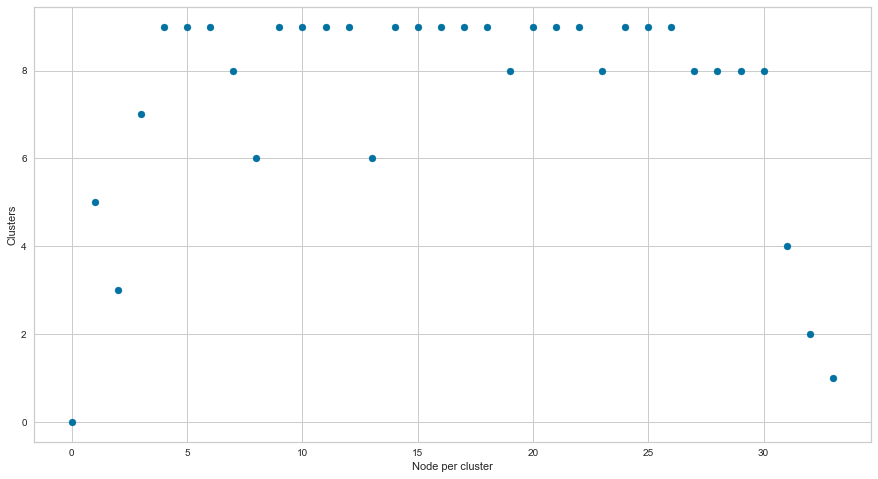

In [360]:
plt.scatter(table.index, table['Cluster'])
plt.xlabel("Node per cluster")
plt.ylabel("Clusters")
plt.show

Agglomerative Clustering

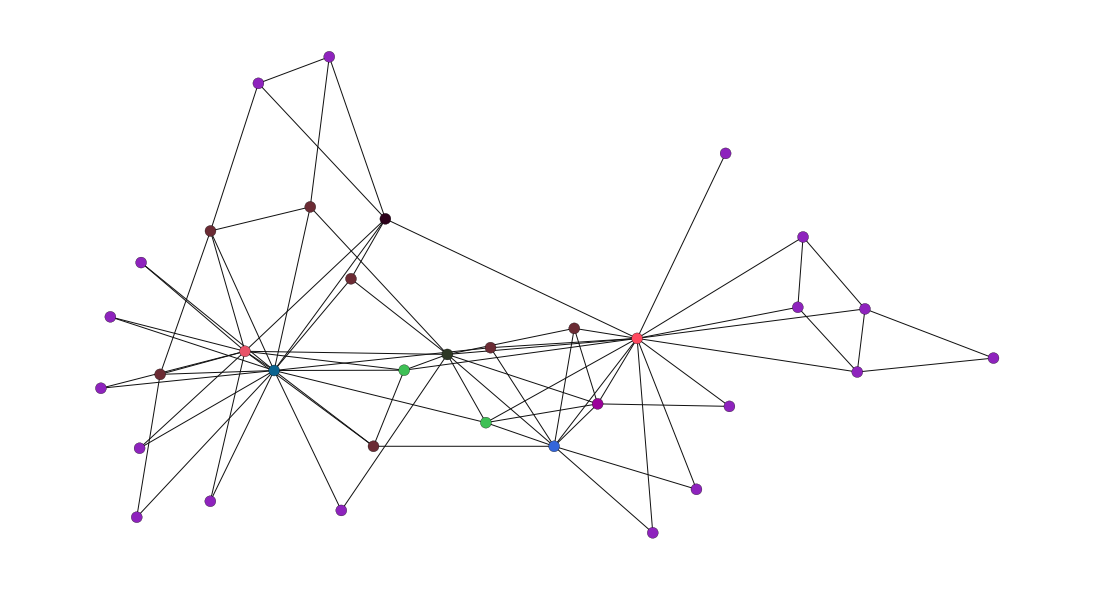

In [361]:
from sklearn import cluster

aggl = cluster.AgglomerativeClustering(n_clusters=k, linkage="ward")
aggl.fit(mesures_matrix)

nx.draw(G_zachary, node_color=colors, with_labels=False, edgecolors="black", node_size=120)
plt.rcParams.update({'figure.figsize': (15, 8)})
plt.show()

Louvain - Community Discovery Library

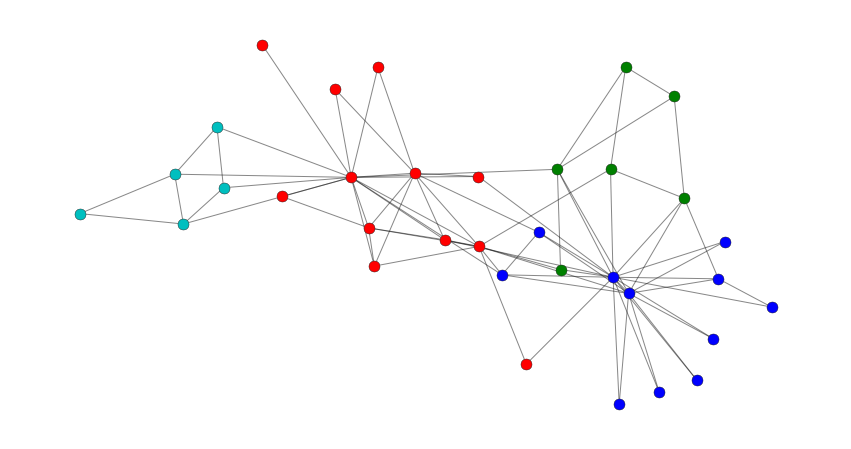

In [367]:
from cdlib import algorithms, viz

communities = algorithms.louvain(G_zachary)

viz.plot_network_clusters(G_zachary, communities, node_size=120, figsize=(15,8), plot_labels=False)

dynamic k-means clustering

1. Elbow methode

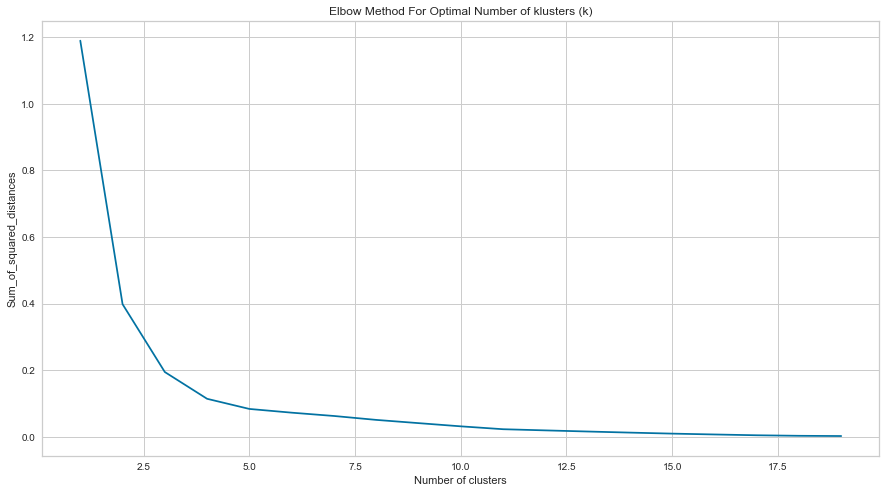

In [368]:
Sum_of_squared_distances = []

# Supose that we want to create 20 clusters in our graph 
# then we will determine the best value of k to get the optimal number of clusters
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(mesures_matrix)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Number of klusters (k)')
plt.show()

In [369]:
from kneed import KneeLocator

# KneeLocator helps us to get the exact k value calculated whit the elbow method whitout reat it from the previous plot
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')
print("The optimal number of klusters is : ",kn.knee)

The optimal number of klusters is :  4


2. KElbow Visualizer

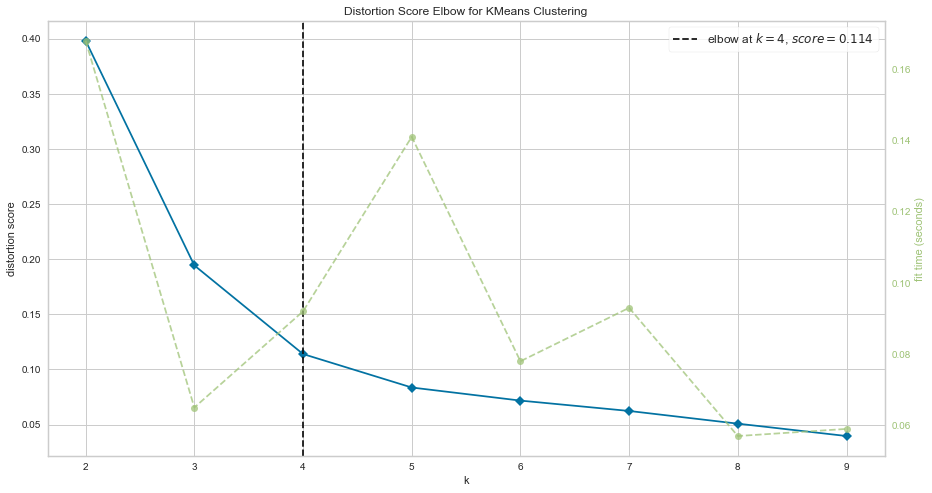

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [370]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

# Fit the data to the visualizer
visualizer.fit(mesures_matrix)

# Finalize and render the figure
visualizer.show()

3. Silhouette Visualizer

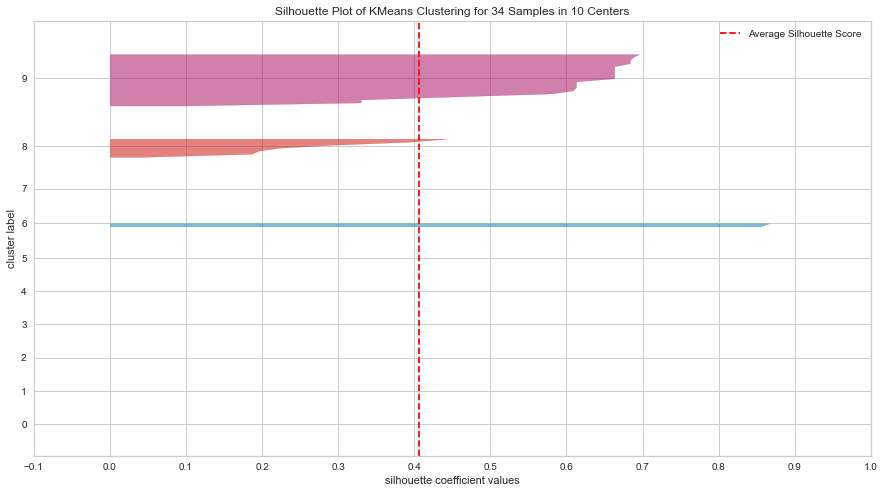

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 34 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [371]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 10, init = mesures_matrix[top_k_node_topsis])
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(mesures_matrix)

# Finalize and render the figure
visualizer.show()